To be done:
- Commento grafici punto 4
- Commento su perchè non sampliamo direttamente dalla posterior nel punto 3

We are given $N=5$ variables and $M$ observations. The observations are:

$$\textbf{x}^{(m)}=(x_1^{(m)},\dots ,x_N^{(m)})$$

Where $x_i^{(m)}\in\{1,\dots,q\}$ are categorical variable. In order to model the interaction between these variables we use the Potts model. Let $J_{ij}\in \R^{q\times q}$ be the coupling matrix for the variables $i$ and $j$ having respectevly colors $a$ and $b$, i.e. if $J_{ij}(a,b)\neq0$ then the variables interact (accordingly to the sign) while if $J_{ij}(a,b)\sim0$ they do not. 

We consider the model:

$$P\left(x\,|\,J\right)=\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Where:

$$Z\left(J\right) = \sum_{x} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Therefore we consider the likelihood:

$$\mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)=\prod_m\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}$$

In order to design a Boltzmann machine learing scheme let us compute the log-likelihood divided by $M$ and its derivative with respect to each parameter $J_{ij}(a,b)$:

$$\mathcal{l}\left( J ; \{x^{(m)} \}_{m=1}^{M} \right) = {\frac{1}{M}}  \sum_{ij}\sum_{ab}\sum_m J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

Then:

\begin{align}
\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)} & = {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

Then by Boltzmann machine learning we can inferr the coupling matrices. The first term of the difference is easly computable, the second quite not. In order to reach our goal we can use a MCMC with Metropolis-Hastings update or Gibbs sampling:

$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

For what concernes the MCMC with Metropolis-Hastings update:


- We start from a uniformly randomly extracted configuration $\boldsymbol{x}^{t = 0}$


- As proposal distribution: extract an index $i\in\{1,\dots,N\}$ and a variable $a\in\{1,\dots,q\}$ and substitute the value of $\delta_{(x_i^{t-1},a)}$ with its opposite ($1\rightarrow0$, $0\rightarrow1$)


- Accept the move with probability:

$$p_{\rm acc} =\min\left[1, \frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})} \right]$$

- Save many configuations and compute $<x_{i} x_{j}>_{\mathrm{model}\left(t\right)}$ at $\sim$ equilibrium 

We have to compute the acceptance ration in our setting. By the simmetry of the proposal distribution $q$ we have:

$$\frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})}=\frac{\tilde{\pi}(x)}{\tilde{\pi}(x^{t-1})}$$

We extract the index $i$ and the color $a$ (different from the actual color of $x_i$) and create the proposal $x^n$ as follows:

$$x_k^n=\begin{cases}
x_k & k\neq i \\
a & k=i
\end{cases}$$

Then:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=\frac{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k^n,c)}\delta_{(x_j^n,b)}}}{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k,c)}\delta_{(x_j,b)}}}=\frac{e^{\sum_{kj}J_{kj}(x_k^n,x_j^n)}}{e^{\sum_{kj}J_{kj}(x_k,x_j)}}$$

Then by definition of $x^n$ and the simmetry $J_{ij}(a,b)=J_{ji}(b,a)$ we have:

$$\sum_{k,j}J_{kj}(x_k^n,x_j^n)-\sum_{k,j}J_{kj}(x_k,x_j)=\sum_{k}J_{ki}(x_k^n,x_i^n)-\sum_{k}J_{ki}(x_k,x_i)+\sum_{j}J_{ij}(x_i^n,x_j^n)-\sum_{j}J_{ij}(x_i,x_j)=$$
$$2\sum_{j\neq i}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally assuming $J_{jj}=0 \,\forall j$ we get:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=2\sum_{j}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally update the parameters until convergence, when the maximum value of the gradient is smaller than a certain threshold.

In [ ]:
function metropolis_ising(x::Vector{Int64}, J::Array{Matrix{Float64}})

    N = length(x)

    i = rand(1:N)       # draw uniformly an index
    c = rand(1:q-1)     # draw uniformly a color different to the current one of x[i], this is equivalent to uniformly draw a number between 1 and q-1
                        # and then add the drawn number to the current categorical state of x[i]
    xi_new = mod1(x[i]+c, q)
    ΔJ = 0
    for j in 1:N
        if j != i  #we exclude j=i because in the first matrix J we use the proposal  
            ΔJ += 2.0*(J[i,j][xi_new, x[j]] - J[i,j][x[i], x[j]])   # argument of the exponential given by the ratio of the target distribution
        end
    end
    ΔJ += (J[i,i][xi_new, xi_new] - J[i,i][x[i], x[i]])
    if rand() < exp(ΔJ)
        x[i] = xi_new    # if the move is accepted, we update it
    end
    return x

end

In [ ]:
function compute_stats(data::Matrix{Int64}, M::Int64; q = 4) #M is the number of observations considered
    N = size(data, 2)
    if M>size(data, 1)
        print("Too large M")
    else
        sij = Array{Matrix{Float64}}(undef, N, N) 
        for i in eachindex(sij)
            sij[i] = zeros(Float64, q, q)
        end

        for i in 1:N, j in 1:N
            for m in 1:M
                sij[i,j][data[m,i], data[m,j]] += 1
            end
            sij[i,j] ./= M
            #sij[j,i] .= sij[i,j]'
        end

        return sij  # this gives us the sample frequencies
    end
end

In [ ]:
using CSV
using DataFrames

df = DataFrame(CSV.File("C:\\Users\\loren_1hne11w\\Documents\\Models&Algorithms\\data.dat", delim = " ", header = false))
select!(df, Not( :Column6))
xdata = Matrix{Int64}(df)
#"C:\\Users\\lucia\\OneDrive\\Desktop\\Documenti\\Collegio Carlo Alberto\\Models and Algorithms\\data.dat"

In [ ]:
M = size(xdata, 1)
sij = compute_stats(xdata, M)

In [ ]:
using ProgressMeter
using Distributions

function boltzmann_learning(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
                                    # ϵ is a parameter checking whether I have reached convergence or not
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising. The matrix J that is used in the call
                                            # of the function is exactly what we want to estimate and that is initialised by the programmer as he
                                            # prefers.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij .- sij_model
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        #ε = maximum.([abs.(Δsij[i]) for i in eachindex(Δsij)])     # to check whether we have reached convergence or not
        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

In [ ]:
N = 5
q = 4

J = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J)
    J[i] = zeros(Float64, q, q)
end


In [ ]:
J, sij_model, ε, xall = boltzmann_learning(sij, J, λ = 0.1, Tmax = 500, εmax = 1e-2)

In [ ]:
ε

In [ ]:
function Frobenius(J::Array{Matrix{Float64}})
    N = size(J,1)
    q = size(J[1], 1)

    Fij = zeros(Float64, N, N)
    for i in 1:N, j in 1:N
        for a in 1:q, b in 1:q
            Fij[i,j] += (J[i,j][a,b])^2
        end
        Fij[i,j] = sqrt(Fij[i,j])
    end
    return Fij
end

In [ ]:
Fij = Frobenius(J)

In [ ]:
using CSV
using DataFrames
groundtruth = DataFrame(CSV.File("groundtruth.dat", delim = " ", header = false))
F = Matrix{Int64}(groundtruth)
f_true=zeros(5,5)
for i in 1:5
    f_true[i,F[i,1]] = 1
    f_true[i,F[i,2]] = 1
end
f_true

In [ ]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij, edgewidth = abs.(Fij), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)


In [ ]:
Z = Any[]
for i in 1:size(Fij,1)
    for j in i+1:size(Fij,2)
        if Fij[i,j]>0.7
            push!(Z, [i,j])
        end
    end
end

In [ ]:
using Plots
using LaTeXStrings
p = Any[]
for i in 1:size(Z,1)
    g = heatmap(J[Z[i][1], Z[i][2]], xlabel = L"%$(Z[i][1])", ylabel = L"%$(Z[i][2])", colorbar_title = L"J_{ij}")
    push!(p,g)
end
plot(p[1], p[2], aspect_ratio = 1)

In [ ]:
plot(p[3], p[4], aspect_ratio = 1)

In [ ]:
uncorrelated = heatmap(J[5,1], xlabel = L"4", ylabel = L"3", colorbar_title = L"J")
plot(p[5], uncorrelated, aspect_ratio = 1)

It is interesting to perform again the estimation of $J$ using a different, Bayesian, approach and then compare the results.

The underlying intuition is the following:

The above "frequentist" Boltzmann machine is aimed at returning a point estimate of J as a result of a maximization problem. In particular, it performs a gradient ascend method in order to maximize the likelihood function and thus it finds numerically the maximum likelihood estimator (MLE) of J, i.e. the value of J for which, under the assumed statistical model, the observed data have the highest joint probability. To better understand its meaning, it is useful to recall that everytime we perform a ML estimation, we are assuming (as in all frequentist statistical inference procedures) a true generating mechanism, that is to say the existence of a true, but unknown, value of the parameter that has generated the data and that we aim to unveil. Thanks to their straightforward interpretation and their "good" properties, MLEs are often used to approximate the true parameter and ML estimation has become a dominant tool to make statistical inference.

What we present next requires the switch from a frequentist to a Bayesian point of view.

Bayesian statisticians consider the parameter as an actual random variable which, therfore, has its own probability distribution. Loosely speaking, in Bayesian statistics a probability expresses a degree of belief: before performing the experiment, the prior distribution of the parameter encodes the a-priori beliefs about the parameter, i.e. what we expect, for any kind of reason, before observing the data. After collecting the data, Bayes theorem is used to incorporate these information in the prior distribution. The result is the so-called posterior distribution of the considered parameter and it embodies our updated beliefs about the parameter, once evidence is observed. The posterior distribution contains our full knowledge about the parameter.

Mathematically, given a prior probability $P(\theta)$ and a likelihood function $P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right)$, the posterior distribution of $\theta$ is, up to a proportionality constant, obtained as

$$P\left(\theta | \,\left\{x^{(m)}\right\}_{i=1}^M\right) \quad \propto \quad P(\theta) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right) $$

The posterior distribution is at the heart of Bayesian inference. Indeed, depending on the situations, meaningful statistics of the parameter can be derived from it and used as estimates of the parameter itself. To be more precise, Bayesian estimation methods are based on the minimization of the posterior risk with respect to a specified loss function. For instance, for a quadratic loss, an absolute error loss or the 0-1 loss function, the Bayes estimator is given, respectively, by the posterior mean, median and mode.

To be more complete, let's us mention the fact that dealing with the 0-1 loss function is actually trickier. Everything works fine in the discrete case, whereas in the continuous one it needs to be expressed in terms of the Dirac delta distribution (and thus it would not be properly a function anymore).

In the particular situation we are considering, we aim at modifying the Boltzmann machine so that it would not return the MLE of our parameter $J$, but an estimate that "exploits" its posterior distribution. As we have shortly argued above, there is not a unique choice for the estimator to be used, nevertheless the maximum a posteriori (MAP) estimate appeared to us as the most natural one.

The MAP estimate is, by definition, the value that maximizes the posterior distribution (its mode):
$$J_{MAP} = \argmax_{J} P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)$$

Its interpretation is clear: it corresponds to the "point" in the parameter space with the "highest probability of occurence", given both the observed data and prior information.

It is also interesting (and easy to observe) that if the prior distribution over the parameter is chosen to be uniform, then the MAP estimate actually coincides with the MLE. Generally a uniform prior distribution is interpreted as an uninformative prior distribution, meaning that it is used when no prior information is available or to prevent our prior beliefs from affecting the results. As a consequence the posterior distribution will be totally specified by the likelihood function and the MLE will be retrieved. This provides further support to our estimation choice: the previous estimation procedure intrinsically emerges as a special case (the one corresponding to a uniform prior distribution) of the method we are going to present.

As a final remark, we can say that the MAP estimate can be considered a "Bayesian generalization of the MLE", since it corresponds to the mode of an augmented optimization objective which incorporates the prior distribution (that quantifies the a-priori additional information available).

Given everything we have said, let us design the new Boltzmann machine learning scheme. Exactly as before, we need to compute the gradient of the objective function we want to maximizes:

$$\begin{aligned}
P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right) = \quad \propto \quad &P(J) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,J \right)\\ & e^{-\lambda \sum_{a,b,i,j}\lvert J_{ij}(a,b) \rvert} \, \prod_m\frac{1}{Z}e^{\sum_{i,j}\sum_{a,b}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}
\end{aligned}$$

It is convenient to take its logarithm and divide everything by M:
$$ (\star) \quad \frac{1}{M} log\left(P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)\right) = - \frac{\lambda}{M}\sum_{a,b,i,j} \lvert J_{ij}(a,b) \rvert + {\frac{1}{M}} \sum_{i,j}\sum_{a,b}\sum_mJ_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

We can now derive the gradient:
\begin{align}
\frac{\partial (\star) }{\partial J_{i,j}(a,b)} & = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

The Boltzmann machine learning scheme can therefore being updated as follows:
$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) \, {-\frac{\lambda*\lambda_{J}}{M}} sign\left( J_{i,j}(a,b) \right) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

In [ ]:
using ProgressMeter
using Distributions

function boltzmann_learning_MAP(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, λ_prior::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
                                    # ϵ is a parameter checking whether I have reached convergence or not
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising. The matrix J that is used in the call
                                            # of the function is exactly what we want to estimate and that is initialised by the programmer as he
                                            # prefers.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij  .- sij_model 
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        for i in 1:N, j in 1:N
            J[i,j] = J[i,j] + (0.1*λ)/dmax .* sign.(J[i,j])
        end
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

In [ ]:
N = 5
q = 4

J_MAP = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_MAP)
    J_MAP[i] = zeros(Float64, q, q)
end

J_MAP, sij_model, ε, xall = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = 500, εmax = 1e-2)

In [ ]:
Fij_MAP = Frobenius(J_MAP)

In order to repeat the inference changing the number of configurations $M$ we recall the function that defines the Boltzmann machine and modify it restraining the number of observations from the file "data.dat". This procedure is actually straighforward given the definition that we gave to the function "compute_stats", in fact we just need to choose the number "M" as we want and then run the Boltzmann machine.

In [ ]:
function compute_stats(data::Matrix{Int64}, M::Int64; q = 4) #M is the number of observations considered
    N = size(data, 2)
    
    sij = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij)
        sij[i] = zeros(Float64, q, q)
    end

    for i in 1:N, j in 1:N
        for m in 1:M
            sij[i,j][data[m,i], data[m,j]] += 1
        end
        sij[i,j] ./= M
        #sij[j,i] .= sij[i,j]'
    end

    return sij  # this gives us the sample frequencies
end

In [76]:
sij1 = compute_stats(xdata, 1)
sij2 = compute_stats(xdata, 10)
sij3 = compute_stats(xdata, 100)
sij4 = compute_stats(xdata, 500)
sij5 = compute_stats(xdata, 1000)


J0 = Array{Matrix{Float64}}(undef, N, N)
for i in eachindex(J)
    J0[i] = zeros(Float64, q, q)
end

J1, sij_model1, ε1, xall1 = boltzmann_learning(sij1, J0, λ = 0.1, Tmax = 500, εmax = 1e-2)

J0 = Array{Matrix{Float64}}(undef, N, N)
for i in eachindex(J)
    J0[i] = zeros(Float64, q, q)
end

J2, sij_model2, ε2, xall2 = boltzmann_learning(sij2, J0, λ = 0.1, Tmax = 500, εmax = 1e-2)

J0 = Array{Matrix{Float64}}(undef, N, N)
for i in eachindex(J)
    J0[i] = zeros(Float64, q, q)
end

J3, sij_model3, ε3, xall3 = boltzmann_learning(sij3, J0, λ = 0.1, Tmax = 500, εmax = 1e-2)

J0 = Array{Matrix{Float64}}(undef, N, N)
for i in eachindex(J)
    J0[i] = zeros(Float64, q, q)
end

J4, sij_model4, ε4, xall4 = boltzmann_learning(sij4, J0, λ = 0.1, Tmax = 500, εmax = 1e-2)

J0 = Array{Matrix{Float64}}(undef, N, N)
for i in eachindex(J)
    J0[i] = zeros(Float64, q, q)
end

J5, sij_model5, ε5, xall5 = boltzmann_learning(sij5, J0, λ = 0.1, Tmax = 500, εmax = 1e-2)

Fij = Frobenius(J1)
Fij2 = Frobenius(J2)
Fij3 = Frobenius(J3)
Fij4 = Frobenius(J4)
Fij5 = Frobenius(J5)

Learning... 2 	 Time: 0:00:00
  ε:  0.06399999999999995

Learning... 3 	 Time: 0:00:01
  ε:  0.040000000000000036

Learning... 4 	 Time: 0:00:01
  ε:  0.03200000000000003

Learning... 5 	 Time: 0:00:01
  ε:  0.02400000000000002

Learning... 6 	 Time: 0:00:01
  ε:  0.026000000000000023

Learning... 7 	 Time: 0:00:02
  ε:  0.016000000000000014

Learning... 7 	 Time: 0:00:02


Learning... 2 	 Time: 0:00:00
  ε:  0.12999999999999998

Learning... 3 	 Time: 0:00:00
  ε:  0.08600000000000001

Learning... 4 	 Time: 0:00:01
  ε:  0.09800000000000002

Learning... 5 	 Time: 0:00:01
  ε:  0.064

Learning... 6 	 Time: 0:00:01
  ε:  0.07

Learning... 7 	 Time: 0:00:02
  ε:  0.056

Learning... 8 	 Time: 0:00:02
  ε:  0.054

Learning... 9 	 Time: 0:00:02
  ε:  0.054000000000000006

Learning... 10 	 Time: 0:00:03
  ε:  0.04999999999999999

Learning... 11 	 Time: 0:00:03
  ε:  0.05400000000000002

Learning... 12 	 Time: 0:00:03
  ε:  0.07599999999999996

Learning... 13 	 Time: 0:00:04
  ε:  0.04199999999999998

Learning... 14 	 Time: 0:00:04
  ε:  0.04000000000000001

Learning... 15 	 Time: 0:00:04
  ε:  0.057999999999999996

Learning... 16 	 Time: 0:00:05
  ε:  0.04000000000000001

Learning... 17 	 Time: 0:00:05
  ε:  0.04999999999999999

Learning... 18 	 Time: 0:00:05
  ε:  0.07800000000000001

Learning... 19 	 Time: 0:00:06
Learning... 20 	 Time: 0:00:06
  ε:  0.04799999999999999

Learning... 21 	 Time: 0:00:06
  ε:  0.08199999999999999

Learning... 22 	 Time: 0:00:07
  ε:  0.058000000000000024

Learning... 23 	 Time: 0:00:07
  ε:  0.058000000000000024

Learning... 24 	 Time: 0:00:07
  ε:  0.04799999999999999

Learning... 25 	 Time: 0:00:08
  ε:  0.036

Learning... 26 	 Time: 0:00:08
  ε:  0.05199999999999999

Learning... 27 	 Time: 0:00:08
  ε:  0.07400000000000001

Learning... 28 	 Time: 0:00:09
  ε:  0.08800000000000002

Learning... 29 	 Time: 0:00:09
  ε:  0.09800000000000003

Learning... 30 	 Time: 0:00:09
Learning... 31 	 Time: 0:00:10
  ε:  0.09800000000000002

Learning... 32 	 Time: 0:00:10
  ε:  0.14200000000000002

Learning... 33 	 Time: 0:00:10
  ε:  0.13

Learning... 34 	 Time: 0:00:11
  ε:  0.048000000000000015

Learning... 35 	 Time: 0:00:11
  ε:  0.05199999999999999

Learning... 36 	 Time: 0:00:11
  ε:  0.07200000000000001

Learning... 37 	 Time: 0:00:12
  ε:  0.07199999999999998

Learning... 38 	 Time: 0:00:12
  ε:  0.09000000000000002

Learning... 39 	 Time: 0:00:12
  ε:  0.10800000000000004

Learning... 40 	 Time: 0:00:13
  ε:  0.03999999999999998

Learning... 41 	 Time: 0:00:13
  ε:  0.062000000000000055

Learning... 42 	 Time: 0:00:13
  ε:  0.10599999999999998

Learning... 43 	 Time: 0:00:14
  ε:  0.11199999999999999

Learning... 44 	 Time: 0:00:14
  ε:  0.057999999999999996

Learning... 45 	 Time: 0:00:14
  ε:  0.08200000000000002

Learning... 46 	 Time: 0:00:15
  ε:  0.07199999999999998

Learning... 47 	 Time: 0:00:15
  ε:  0.09400000000000003

Learning... 48 	 Time: 0:00:15
  ε:  0.05199999999999999

Learning... 49 	 Time: 0:00:15
  ε:  0.07

Learning... 50 	 Time: 0:00:16
  ε:  0.122

Learning... 50 	 Time: 0:00:16


Learning... 2 	 Time: 0:00:00
  ε:  0.072

Learning... 3 	 Time: 0:00:01
  ε:  0.058

Learning... 4 	 Time: 0:00:01
  ε:  0.052

Learning... 5 	 Time: 0:00:01
  ε:  0.048

Learning... 6 	 Time: 0:00:01
  ε:  0.046

Learning... 7 	 Time: 0:00:02
  ε:  0.05

Learning... 8 	 Time: 0:00:02
  ε:  0.046

Learning... 9 	 Time: 0:00:03
  ε:  0.03799999999999998

Learning... 10 	 Time: 0:00:03
  ε:  0.03

Learning... 11 	 Time: 0:00:03
  ε:  0.04

Learning... 12 	 Time: 0:00:03
Learning... 13 	 Time: 0:00:04
  ε:  0.045999999999999985

Learning... 14 	 Time: 0:00:04
  ε:  0.04999999999999999

Learning... 15 	 Time: 0:00:04
  ε:  0.05399999999999999

Learning... 16 	 Time: 0:00:05
  ε:  0.04200000000000001

Learning... 17 	 Time: 0:00:05
  ε:  0.04400000000000004

Learning... 18 	 Time: 0:00:06
  ε:  0.04400000000000001

Learning... 19 	 Time: 0:00:07
  ε:  0.04800000000000004

Learning... 20 	 Time: 0:00:07
  ε:  0.055999999999999994

Learning... 21 	 Time: 0:00:08
  ε:  0.036

Learning... 22 	 Time: 0:00:09
  ε:  0.04000000000000001

Learning... 23 	 Time: 0:00:09
  ε:  0.04400000000000001

Learning... 24 	 Time: 0:00:10
  ε:  0.038000000000000006

Learning... 25 	 Time: 0:00:10
  ε:  0.031999999999999994

Learning... 26 	 Time: 0:00:11
  ε:  0.05399999999999999

Learning... 27 	 Time: 0:00:12
  ε:  0.04000000000000001

Learning... 28 	 Time: 0:00:12
  ε:  0.05399999999999999

Learning... 29 	 Time: 0:00:13
  ε:  0.04999999999999999

Learning... 30 	 Time: 0:00:13
  ε:  0.038000000000000006

Learning... 31 	 Time: 0:00:14
  ε:  0.04799999999999999

Learning... 32 	 Time: 0:00:15
  ε:  0.02799999999999997

Learning... 33 	 Time: 0:00:15
  ε:  0.038000000000000006

Learning... 34 	 Time: 0:00:16
  ε:  0.034

Learning... 35 	 Time: 0:00:16
  ε:  0.03999999999999998

Learning... 36 	 Time: 0:00:17
  ε:  0.03

Learning... 37 	 Time: 0:00:18
  ε:  0.03799999999999999

Learning... 38 	 Time: 0:00:18
  ε:  0.04400000000000001

Learning... 39 	 Time: 0:00:19
  ε:  0.055999999999999994

Learning... 40 	 Time: 0:00:19
  ε:  0.04000000000000001

Learning... 41 	 Time: 0:00:20
  ε:  0.036000000000000004

Learning... 42 	 Time: 0:00:21
  ε:  0.04799999999999999

Learning... 43 	 Time: 0:00:21
  ε:  0.040000000000000036

Learning... 44 	 Time: 0:00:22
  ε:  0.04799999999999999

Learning... 45 	 Time: 0:00:22
  ε:  0.04200000000000001

Learning... 46 	 Time: 0:00:23
  ε:  0.030000000000000027

Learning... 47 	 Time: 0:00:24
  ε:  0.027999999999999997

Learning... 48 	 Time: 0:00:24
  ε:  0.04000000000000001

Learning... 49 	 Time: 0:00:25
  ε:  0.038

Learning... 50 	 Time: 0:00:25
  ε:  0.045999999999999985

Learning... 50 	 Time: 0:00:25


Learning... 2 	 Time: 0:00:01
  ε:  0.053999999999999965

Learning... 3 	 Time: 0:00:01
  ε:  0.05400000000000002

Learning... 4 	 Time: 0:00:02
  ε:  0.039999999999999994

Learning... 5 	 Time: 0:00:03
  ε:  0.058

Learning... 6 	 Time: 0:00:03
  ε:  0.035999999999999976

Learning... 7 	 Time: 0:00:04
  ε:  0.032

Learning... 8 	 Time: 0:00:05
  ε:  0.05200000000000002

Learning... 9 	 Time: 0:00:05
  ε:  0.04400000000000001

Learning... 10 	 Time: 0:00:06
  ε:  0.03999999999999998

Learning... 11 	 Time: 0:00:06
  ε:  0.036000000000000004

Learning... 12 	 Time: 0:00:07
  ε:  0.038000000000000006

Learning... 13 	 Time: 0:00:08
  ε:  0.036000000000000004

Learning... 14 	 Time: 0:00:08
  ε:  0.036000000000000004

Learning... 15 	 Time: 0:00:09
  ε:  0.034

Learning... 16 	 Time: 0:00:09
  ε:  0.04000000000000001

Learning... 17 	 Time: 0:00:10
  ε:  0.04600000000000001

Learning... 18 	 Time: 0:00:11
  ε:  0.02999999999999997

Learning... 19 	 Time: 0:00:11
  ε:  0.031999999999999994

Learning... 20 	 Time: 0:00:12
  ε:  0.04999999999999996

Learning... 21 	 Time: 0:00:12
  ε:  0.032

Learning... 22 	 Time: 0:00:13
  ε:  0.032

Learning... 23 	 Time: 0:00:14
  ε:  0.04600000000000001

Learning... 24 	 Time: 0:00:14
  ε:  0.028000000000000025

Learning... 25 	 Time: 0:00:15
  ε:  0.04199999999999998

Learning... 26 	 Time: 0:00:16
  ε:  0.04000000000000001

Learning... 27 	 Time: 0:00:16
  ε:  0.034

Learning... 28 	 Time: 0:00:17
  ε:  0.04799999999999999

Learning... 29 	 Time: 0:00:17
  ε:  0.04999999999999996

Learning... 30 	 Time: 0:00:18
  ε:  0.04999999999999999

Learning... 31 	 Time: 0:00:19
  ε:  0.032

Learning... 32 	 Time: 0:00:19
  ε:  0.04200000000000001

Learning... 33 	 Time: 0:00:20
  ε:  0.04799999999999999

Learning... 34 	 Time: 0:00:20
  ε:  0.030000000000000006

Learning... 35 	 Time: 0:00:21
  ε:  0.03

Learning... 36 	 Time: 0:00:22
  ε:  0.038000000000000006

Learning... 37 	 Time: 0:00:22
  ε:  0.045999999999999985

Learning... 38 	 Time: 0:00:23
  ε:  0.05200000000000002

Learning... 39 	 Time: 0:00:23
  ε:  0.038000000000000006

Learning... 40 	 Time: 0:00:24
  ε:  0.05199999999999999

Learning... 41 	 Time: 0:00:25
  ε:  0.03199999999999997

Learning... 42 	 Time: 0:00:25
  ε:  0.03999999999999998

Learning... 43 	 Time: 0:00:26
  ε:  0.043999999999999984

Learning... 44 	 Time: 0:00:27
  ε:  0.045999999999999985

Learning... 45 	 Time: 0:00:27
  ε:  0.038000000000000006

Learning... 46 	 Time: 0:00:28
  ε:  0.05199999999999999

Learning... 47 	 Time: 0:00:28
  ε:  0.036000000000000004

Learning... 48 	 Time: 0:00:29
  ε:  0.05399999999999999

Learning... 49 	 Time: 0:00:29
  ε:  0.04199999999999998

Learning... 50 	 Time: 0:00:30
  ε:  0.07600000000000004

Learning... 50 	 Time: 0:00:30


Learning... 2 	 Time: 0:00:01
  ε:  0.052000000000000005

Learning... 3 	 Time: 0:00:01
  ε:  0.04899999999999999

Learning... 4 	 Time: 0:00:02
  ε:  0.037000000000000005

Learning... 5 	 Time: 0:00:02
  ε:  0.04200000000000001

Learning... 6 	 Time: 0:00:03
  ε:  0.04300000000000001

Learning... 7 	 Time: 0:00:04
  ε:  0.034999999999999996

Learning... 8 	 Time: 0:00:04
  ε:  0.04300000000000001

Learning... 9 	 Time: 0:00:05
  ε:  0.03699999999999999

Learning... 10 	 Time: 0:00:06
  ε:  0.04299999999999998

Learning... 11 	 Time: 0:00:06
  ε:  0.037000000000000005

Learning... 12 	 Time: 0:00:07
  ε:  0.049000000000000016

Learning... 13 	 Time: 0:00:08
  ε:  0.04300000000000001

Learning... 14 	 Time: 0:00:08
  ε:  0.031

Learning... 15 	 Time: 0:00:09
  ε:  0.047000000000000014

Learning... 16 	 Time: 0:00:10
  ε:  0.04999999999999999

Learning... 17 	 Time: 0:00:10
  ε:  0.05799999999999997

Learning... 18 	 Time: 0:00:11
  ε:  0.028000000000000025

Learning... 19 	 Time: 0:00:12
  ε:  0.05499999999999999

Learning... 20 	 Time: 0:00:12
  ε:  0.04799999999999999

Learning... 21 	 Time: 0:00:13
  ε:  0.05299999999999999

Learning... 22 	 Time: 0:00:13
  ε:  0.03999999999999998

Learning... 23 	 Time: 0:00:14
  ε:  0.04100000000000001

Learning... 24 	 Time: 0:00:15
  ε:  0.05299999999999999

Learning... 25 	 Time: 0:00:15
  ε:  0.03899999999999998

Learning... 26 	 Time: 0:00:16
  ε:  0.03500000000000003

Learning... 27 	 Time: 0:00:16
  ε:  0.029000000000000005

Learning... 28 	 Time: 0:00:17
  ε:  0.031

Learning... 29 	 Time: 0:00:18
  ε:  0.03500000000000003

Learning... 30 	 Time: 0:00:18
  ε:  0.036000000000000004

Learning... 31 	 Time: 0:00:19
  ε:  0.04300000000000001

Learning... 32 	 Time: 0:00:19
  ε:  0.05199999999999999

Learning... 33 	 Time: 0:00:20
  ε:  0.028000000000000025

Learning... 34 	 Time: 0:00:20
  ε:  0.05499999999999999

Learning... 35 	 Time: 0:00:21
  ε:  0.03899999999999998

Learning... 36 	 Time: 0:00:22
Learning... 37 	 Time: 0:00:22
  ε:  0.03599999999999999

Learning... 38 	 Time: 0:00:23
  ε:  0.038000000000000006

Learning... 39 	 Time: 0:00:24
  ε:  0.08099999999999999

Learning... 40 	 Time: 0:00:24
  ε:  0.04299999999999998

Learning... 41 	 Time: 0:00:25
  ε:  0.03999999999999998

Learning... 42 	 Time: 0:00:26
  ε:  0.04199999999999998

Learning... 43 	 Time: 0:00:27
  ε:  0.043999999999999984

Learning... 44 	 Time: 0:00:27
  ε:  0.03299999999999999

Learning... 45 	 Time: 0:00:28
  ε:  0.030999999999999993

Learning... 46 	 Time: 0:00:29
  ε:  0.061

Learning... 47 	 Time: 0:00:29
  ε:  0.026999999999999996

Learning... 48 	 Time: 0:00:30
  ε:  0.031

Learning... 49 	 Time: 0:00:30
  ε:  0.063

Learning... 50 	 Time: 0:00:30
  ε:  0.03699999999999998

Learning... 50 	 Time: 0:00:30


5×5 Matrix{Float64}:
 0.0433251  0.804412   0.834202   0.20146    0.154131
 0.804412   0.0398522  0.216865   0.883062   0.147954
 0.834202   0.216865   0.0237638  0.173795   0.778493
 0.20146    0.883062   0.173795   0.0546439  1.03274
 0.154131   0.147954   0.778493   1.03274    0.0235839

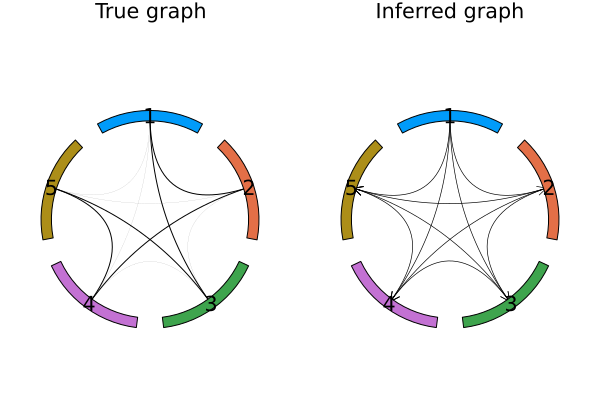

In [77]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij, edgewidth = abs.(Fij), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)

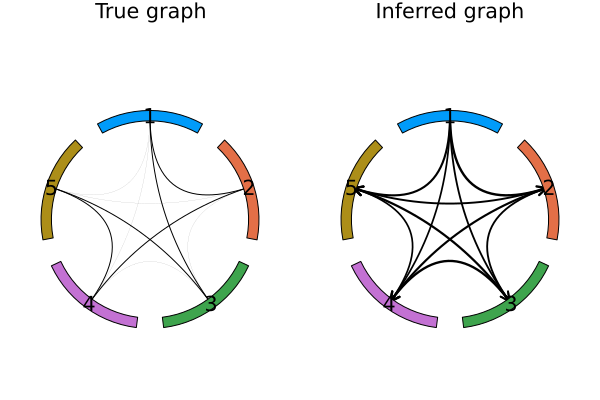

In [78]:
using GraphRecipes
using NetworkLayout
using Plots
p3 = graphplot(Fij2, edgewidth = abs.(Fij2), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p3, aspect_ratio = 1)

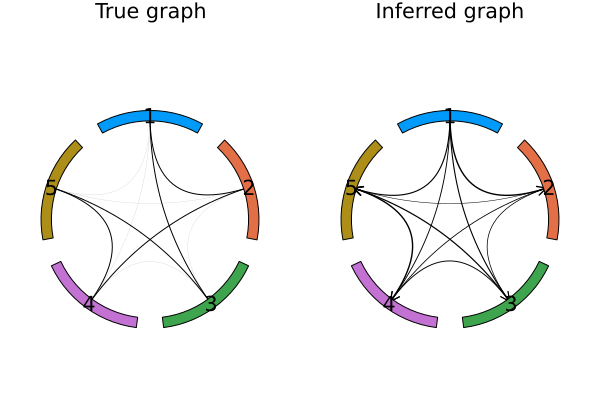

In [79]:
p4 = graphplot(Fij3, edgewidth = abs.(Fij3), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p4, aspect_ratio = 1)

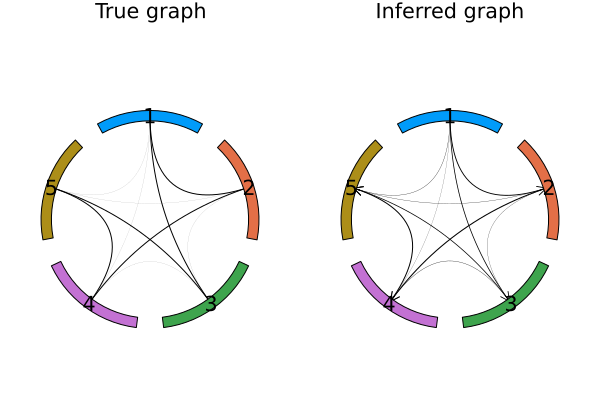

In [80]:
p5 = graphplot(Fij4, edgewidth = abs.(Fij4), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p5, aspect_ratio = 1)

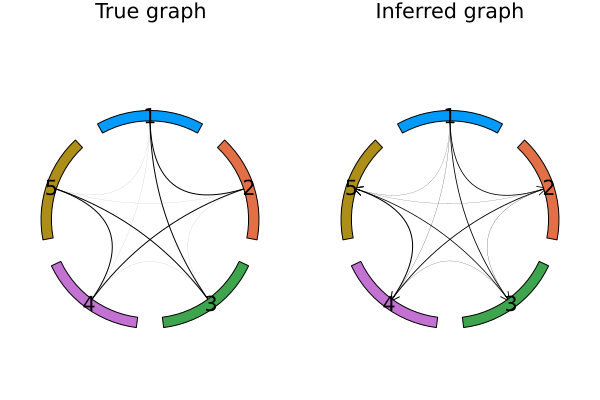

In [81]:
p6 = graphplot(Fij5, edgewidth = abs.(Fij5), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p6, aspect_ratio = 1)

$\color{yellow}{\text{I'm having troubles with VSC and therefore I cannot run the code. Anyways I think that the only thing we can comment about this point is that the less observations we consider the less accurate is our inference, and it should be clear from the Frobenius norms and the corresponding graphs (those with the lines that connect each color). What would you add?}}$

One of the main problems of MCMC is that the samples are not independent. Therefore usually the collection of samples is done waiting a time interval $\Delta t$ that brings independece between samples. In order to quantify this correlation we estimate the autocorrelation function associated to the Markov chain that fetures the Bolzmann Machine. We recall that the autocorrelation function has the form:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu_t)(x^{(s)}-\mu_s)]}{\sqrt {\sigma_t^2\sigma_s^2}}
\end{align}
Because of the stationarity of the Markov chain we get:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu)(x^{(t+r)}-\mu)]}{\sigma^2}
\end{align} 
As seen in the lecture an unbiased Monte Carlo estimator of $\gamma$ is given by:
\begin{align}
\hat{\gamma}_n(r) = \frac{\frac{1}{n-r}\sum_{k=1}^{n-r}(\hat{x}^{(k)}-\hat{\mu}_n)(\hat{x}^{(k+r)}-\hat{\mu}_n)}{\frac{1}{n}\sum_{k=1}^{n}(\hat{x}^{(k)}-\hat{\mu}_n)^2}
\end{align}

In [ ]:
function autocorrelation(x::Array(Int64), R::Int64)
    n = lenght(x)
    μ = sum(x) / n
    gamma = [0.0 for i in 1:R]

    for r in 1:R
        for i in 1:(n-r+1)
            gamma[r] += (x[i] - μ) * (x[i+r-1] - μ) / (n - r + 1)
        end
    end

    var = gamma[1]
    gamma ./= var
end

$\color{yellow}{\text{In order to vary both M and }\Delta t \text{ we could construct a matrix of xall. Also, I don't know which R to use. We then inferr the autocorrelation by passing to "autocorrelation" the xall of the matrix}}$